In [3]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [139]:
df = pd.read_csv('crop.csv')

In [4]:
df.head(2)

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663


In [140]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    #df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    #return df
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

cols_to_process = ['honeybee','bumbles','andrena','osmia']
for col in cols_to_process:
    df = remove_outliers(df, col)

In [141]:
df['mean_temp'] = df[['MaxOfUpperTRange','MinOfUpperTRange','MaxOfLowerTRange','MinOfLowerTRange']].mean(axis=1)

In [24]:
def run_model(name,model,x_train,x_test,y_train,y_test):

    print(f"Evaluating {name}...")
    
    model.fit(x_train,y_train)
    
    print("\n***Stats on training data***")
    
    y_pred = model.predict(x_train)

    mse = mean_squared_error(y_train, y_pred)
    r2 = r2_score(y_train, y_pred)
    mean_cv_score = np.mean(cross_val_score(model,x_train,y_train,cv=10))
    
    X_combined = x_train.mean(axis=1).values.reshape(-1, 1)
    m_actual, b_actual = np.polyfit(X_combined.flatten(), y_train, 1)
    m_pred, b_pred = np.polyfit(X_combined.flatten(), y_pred, 1)

    print(f"\nMSE: {mse}")
    print(f"RMSE: {mse**(1/2)}")
    print(f"Mean Cross Validation Score: {mean_cv_score}")
    print(f"R² score for : {r2}")
    print(f'Slope(actual): {m_actual} and intercept(actual): {b_actual}')
    print(f'Slope(pred): {m_pred} and intercept(pred): {b_pred}\n')

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))

    y_actual_line = m_actual * X_combined + b_actual
    y_pred_line = m_pred * X_combined + b_pred

    ax[0].scatter(X_combined, y_train, alpha=0.5, label='Actual Training Point', color='blue')
    ax[0].scatter(X_combined, y_pred, alpha=0.5, label='Predicted Training Point', color='red')
    ax[0].plot(X_combined, y_actual_line, color='blue', linewidth=1,alpha=0.5, label=f'Actual (m={m_actual:.2f}, b={b_actual:.2f})')
    ax[0].plot(X_combined, y_pred_line, color='red',alpha=0.5 ,linewidth=1, label=f'Predicted (m={m_pred:.2f}, b={b_pred:.2f})')
    mse_r2_box = f'RMSE: {mse**(1/2):.3f}\nR2: {r2:.2f}'
    ax[0].text(0.8, 0.9, mse_r2_box, transform=ax[0].transAxes,fontsize='12' , bbox=dict(facecolor='white', alpha=0.5))
    ax[0].legend(fontsize='12',loc='lower left')
    ax[0].set_title('Overlapping Training Scatterplot of Actual and Predicted Values')

    print("\n*** Stats on testing data***")

    y_pred = model.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mean_cv_score = np.mean(cross_val_score(model,x_train,y_train,cv=10))
    
    X_combined = x_test.mean(axis=1).values.reshape(-1, 1)
    m_actual, b_actual = np.polyfit(X_combined.flatten(), y_test, 1)
    m_pred, b_pred = np.polyfit(X_combined.flatten(), y_pred, 1)

    print(f"\nMSE: {mse}")
    print(f"RMSE: {mse**(1/2)}")
    print(f"Mean Cross Validation Score: {mean_cv_score}")
    print(f"R² score for : {r2}")
    print(f'Slope(actual): {m_actual} and intercept(actual): {b_actual}')
    print(f'Slope(pred): {m_pred} and intercept(pred): {b_pred}\n')
    

    y_actual_line = m_actual * X_combined + b_actual
    y_pred_line = m_pred * X_combined + b_pred

    ax[1].scatter(X_combined, y_test, alpha=0.5, label='Actual Test Point', color='blue')
    ax[1].scatter(X_combined, y_pred, alpha=0.5, label='Predicted Test Point', color='red')
    ax[1].plot(X_combined, y_actual_line, color='blue', linewidth=1,alpha=0.5, label=f'Actual (m={m_actual:.2f}, b={b_actual:.2f})')
    ax[1].plot(X_combined, y_pred_line, color='red',alpha=0.5 ,linewidth=1, label=f'Predicted (m={m_pred:.2f}, b={b_pred:.2f})')
    mse_r2_box = f'RMSE: {mse**(1/2):.3f}\nR2: {r2:.2f}'
    ax[1].text(0.8, 0.9, mse_r2_box, transform=ax[1].transAxes,fontsize='12' , bbox=dict(facecolor='white', alpha=0.5))
    ax[1].legend(fontsize='12', loc='lower left')
    ax[1].set_title('Overlapping Testing Scatterplot of Actual and Predicted Values')


    plt.tight_layout()
    plt.show()

    return model

In [142]:
df.columns

Index(['Row#', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield', 'mean_temp'],
      dtype='object')

In [143]:
colns = ['clonesize','honeybee','bumbles','andrena','osmia','mean_temp','AverageRainingDays']

In [144]:
df1 = df.groupby(colns).agg({'yield': 'median'}).reset_index()

In [11]:
X = df1[colns]
Y = df1['yield']

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,BaggingRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [116]:
linReg_model = LinearRegression()
dtReg_model = DecisionTreeRegressor(max_depth = 5, random_state=42)
rfReg_model = RandomForestRegressor(n_estimators=90, max_depth=3, random_state=42)
knnReg_model = KNeighborsRegressor(n_neighbors=22, algorithm='auto')
svReg_model = SVR(C=3, epsilon=0.1, kernel='linear')
gbReg_model = GradientBoostingRegressor(learning_rate=0.3, n_estimators=30, max_depth=3, subsample=0.8, random_state=42, alpha=0.1)
bgReg_model = BaggingRegressor(estimator=RandomForestRegressor(max_depth=3, n_estimators=20), n_estimators=42, random_state=42)
adbReg_model = AdaBoostRegressor(estimator=RandomForestRegressor(max_depth=3, n_estimators=20), n_estimators=42, learning_rate=0.1, random_state=42)
xgb_model = XGBRegressor(objective='reg:squarederror',n_estimators=50, max_depth=3, min_child_weight=5, 
                     learning_rate = 0.3, subsample = 0.8, 
                     colsample_bytree=0.8, reg_alpha = 0.1, reg_lambda = 0.1,random_state=42)

In [117]:
models = [linReg_model, dtReg_model, rfReg_model, knnReg_model, svReg_model, gbReg_model, bgReg_model, adbReg_model, xgb_model]
names = ["LINEAR REGRESSOR", "DECISION TREE REGRESSOR", "RANDOM FOREST REGRESSOR", "K-NEIGHBOURS REGRESSOR", "SUPPORT VECTOR REGRESSOR", "GRADIENT BOOSTING REGRESSOR", "BAGGING REGRESSOR", "ADABOOST REGRESSOR", "XGBOOST REGRESSOR"]

In [127]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

Evaluating LINEAR REGRESSOR...

***Stats on training data***

MSE: 367237.30903499183
RMSE: 606.0010800609119
Mean Cross Validation Score: 0.7784510659679619
R² score for : 0.7966582153917772
Slope(actual): -490.69707506176667 and intercept(actual): 11347.077703538986
Slope(pred): -490.697075061846 and intercept(pred): 11347.077703539846


*** Stats on testing data***

MSE: 268269.89693003497
RMSE: 517.947774326751
Mean Cross Validation Score: 0.7784510659679619
R² score for : 0.8464765056869005
Slope(actual): -502.0819097212534 and intercept(actual): 11484.13713732688
Slope(pred): -461.921380978906 and intercept(pred): 11062.425500450558



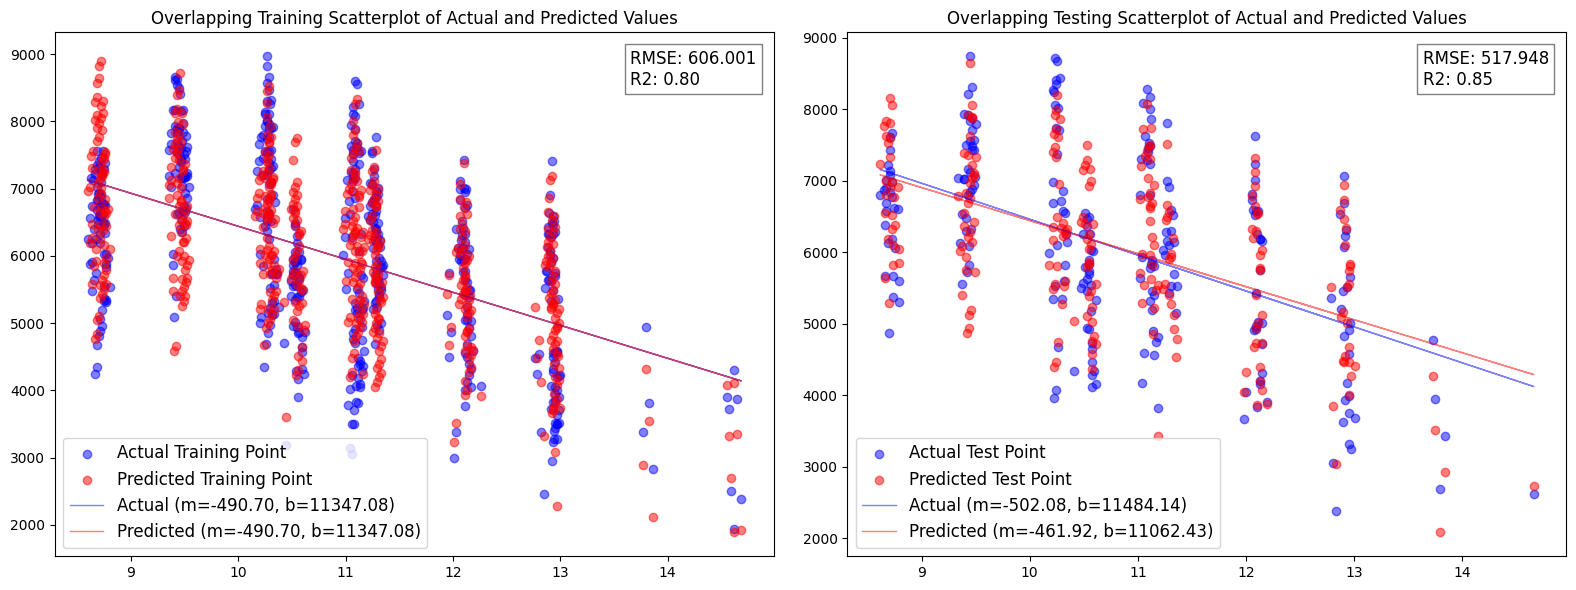

Evaluating DECISION TREE REGRESSOR...

***Stats on training data***

MSE: 218988.4606018792
RMSE: 467.9620290171834
Mean Cross Validation Score: 0.8294513223207071
R² score for : 0.8787446065749527
Slope(actual): -490.69707506176667 and intercept(actual): 11347.077703538986
Slope(pred): -462.17161454174817 and intercept(pred): 11038.350450795297


*** Stats on testing data***

MSE: 206779.10501272941
RMSE: 454.72970544349687
Mean Cross Validation Score: 0.8294513223207071
R² score for : 0.8816659971328471
Slope(actual): -502.0819097212534 and intercept(actual): 11484.13713732688
Slope(pred): -481.83316888662927 and intercept(pred): 11290.961709287205



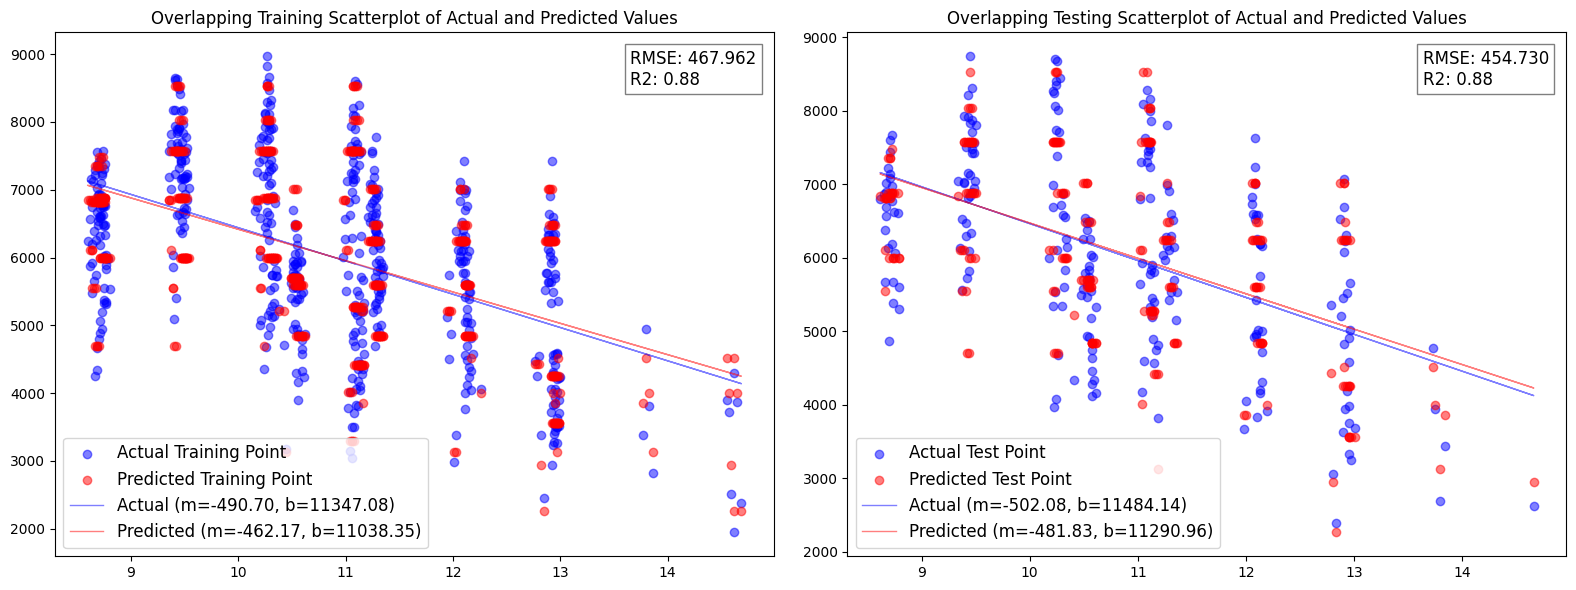

Evaluating RANDOM FOREST REGRESSOR...

***Stats on training data***

MSE: 408838.7070211781
RMSE: 639.4049632440916
Mean Cross Validation Score: 0.7383285409281501
R² score for : 0.7736232396401658
Slope(actual): -490.69707506176667 and intercept(actual): 11347.077703538986
Slope(pred): -442.5234829902439 and intercept(pred): 10835.220992508763


*** Stats on testing data***

MSE: 397300.9354678711
RMSE: 630.3181224333242
Mean Cross Validation Score: 0.7383285409281501
R² score for : 0.7726355860091212
Slope(actual): -502.0819097212534 and intercept(actual): 11484.13713732688
Slope(pred): -457.3525679179931 and intercept(pred): 11043.228656996622



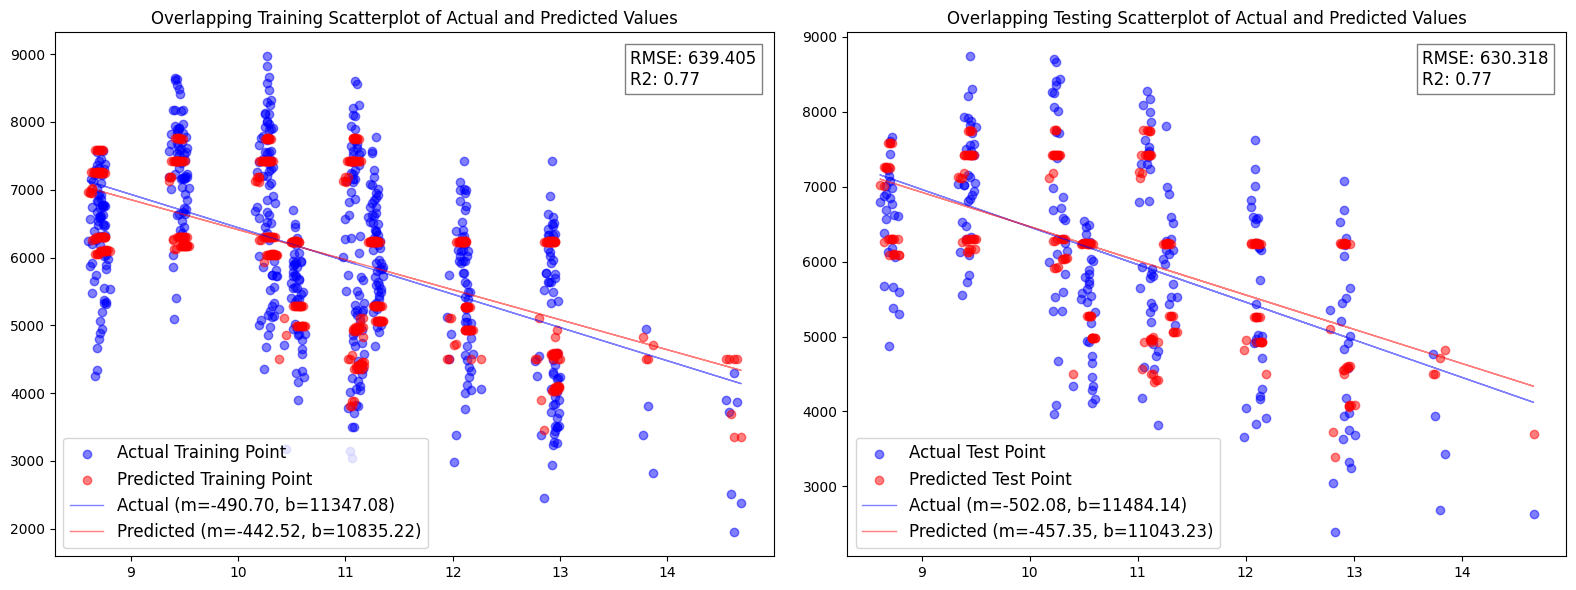

Evaluating K-NEIGHBOURS REGRESSOR...

***Stats on training data***

MSE: 288670.4271391914
RMSE: 537.280585112836
Mean Cross Validation Score: 0.7946224519782072
R² score for : 0.8401612298806271
Slope(actual): -490.69707506176667 and intercept(actual): 11347.077703538986
Slope(pred): -471.8732812333655 and intercept(pred): 11233.83779359654


*** Stats on testing data***

MSE: 345149.0742378733
RMSE: 587.4938929366614
Mean Cross Validation Score: 0.7946224519782072
R² score for : 0.802480663904869
Slope(actual): -502.0819097212534 and intercept(actual): 11484.13713732688
Slope(pred): -485.12744434859036 and intercept(pred): 11414.344356275857



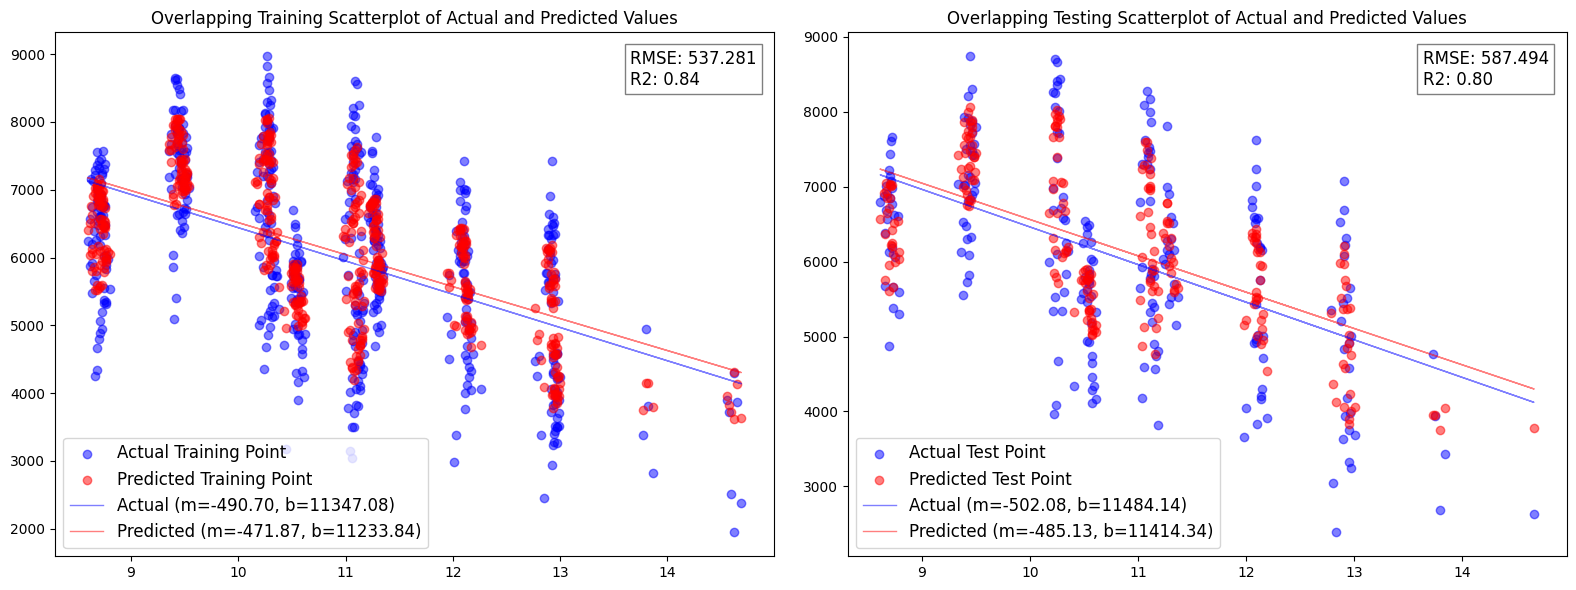

Evaluating SUPPORT VECTOR REGRESSOR...

***Stats on training data***

MSE: 1294797.562243516
RMSE: 1137.8917181540237
Mean Cross Validation Score: 0.24610273337562544
R² score for : 0.2830618225996038
Slope(actual): -490.69707506176667 and intercept(actual): 11347.077703538986
Slope(pred): -423.24487487235643 and intercept(pred): 10781.64037983151


*** Stats on testing data***

MSE: 1127827.0578623624
RMSE: 1061.992023445733
Mean Cross Validation Score: 0.24610273337562544
R² score for : 0.35457554915656686
Slope(actual): -502.0819097212534 and intercept(actual): 11484.13713732688
Slope(pred): -422.188343291363 and intercept(pred): 10747.405974602372



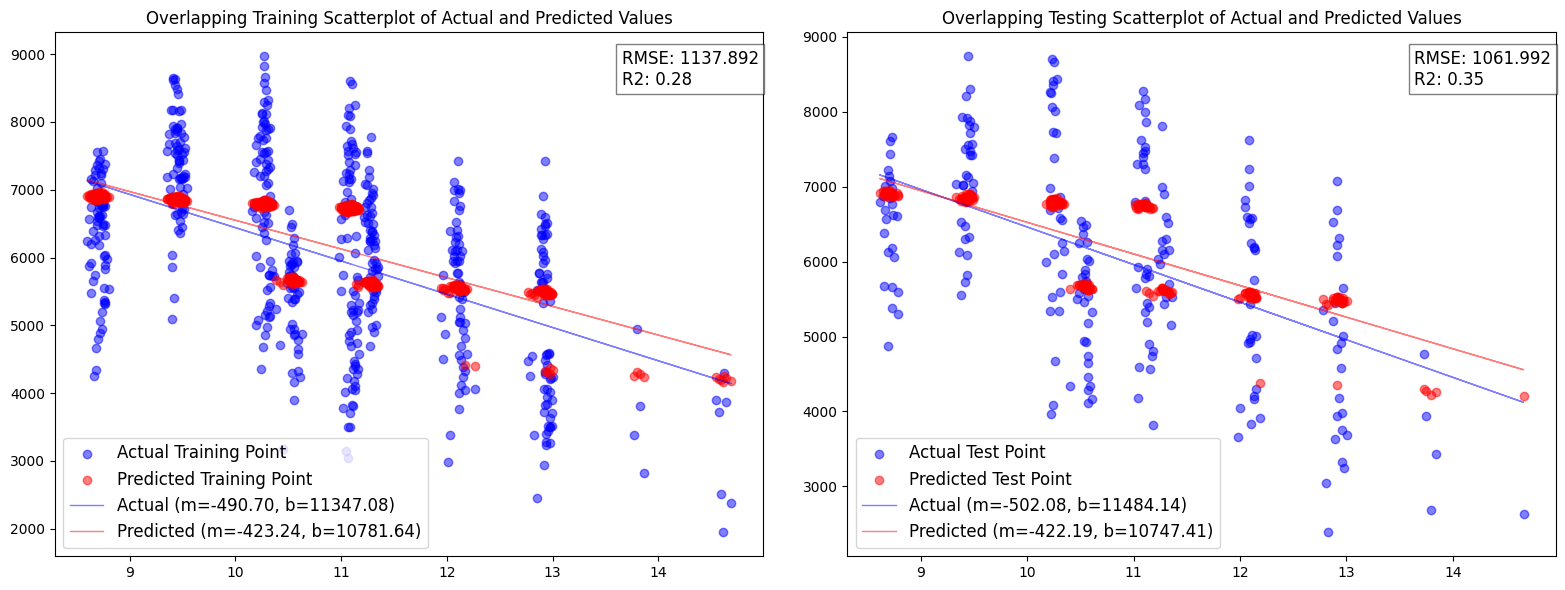

Evaluating GRADIENT BOOSTING REGRESSOR...

***Stats on training data***

MSE: 34517.92890396237
RMSE: 185.79001292847354
Mean Cross Validation Score: 0.9706772684239022
R² score for : 0.9808871890419971
Slope(actual): -490.69707506176667 and intercept(actual): 11347.077703538986
Slope(pred): -487.1508706806328 and intercept(pred): 11313.872641045338


*** Stats on testing data***

MSE: 44719.04464986495
RMSE: 211.4687793738474
Mean Cross Validation Score: 0.9706772684239022
R² score for : 0.9744085188999745
Slope(actual): -502.0819097212534 and intercept(actual): 11484.13713732688
Slope(pred): -488.93296433274355 and intercept(pred): 11366.234842817701



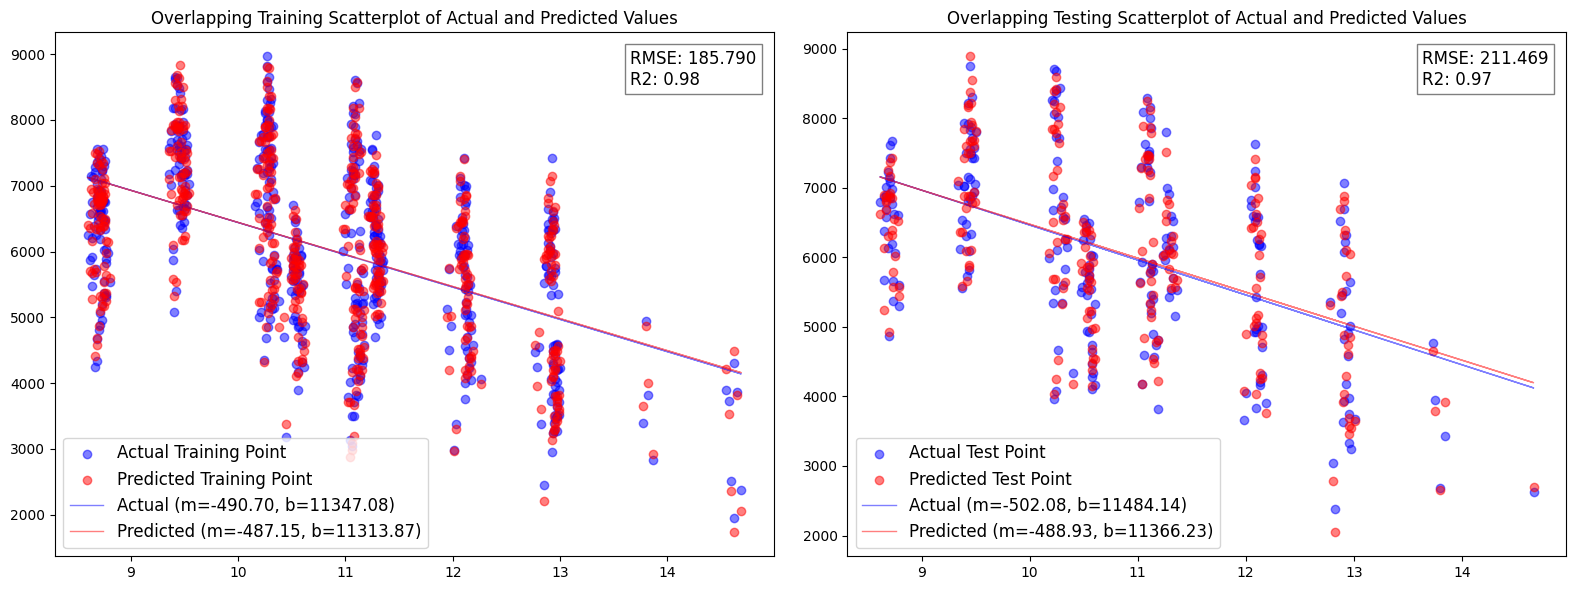

Evaluating BAGGING REGRESSOR...

***Stats on training data***

MSE: 372561.1474086092
RMSE: 610.3778726400632
Mean Cross Validation Score: 0.7675272958221806
R² score for : 0.7937103700361356
Slope(actual): -490.69707506176667 and intercept(actual): 11347.077703538986
Slope(pred): -421.4281621704065 and intercept(pred): 10623.544972108555


*** Stats on testing data***

MSE: 349033.6855907563
RMSE: 590.7907291002088
Mean Cross Validation Score: 0.7675272958221806
R² score for : 0.8002576075136465
Slope(actual): -502.0819097212534 and intercept(actual): 11484.13713732688
Slope(pred): -436.70237521301686 and intercept(pred): 10837.481050577431



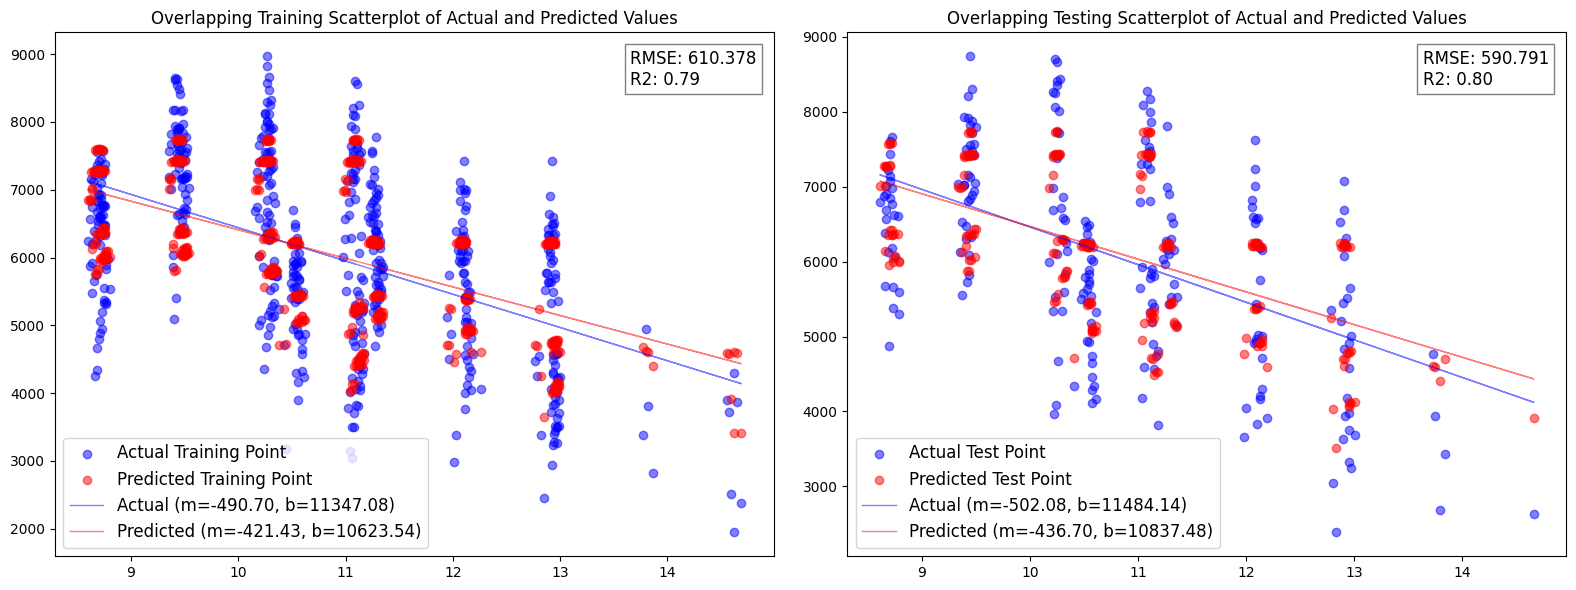

Evaluating ADABOOST REGRESSOR...

***Stats on training data***

MSE: 328924.991986127
RMSE: 573.5198270209384
Mean Cross Validation Score: 0.7959876499391363
R² score for : 0.8178720047577425
Slope(actual): -490.69707506176667 and intercept(actual): 11347.077703538986
Slope(pred): -416.49707109566634 and intercept(pred): 10564.251838589627


*** Stats on testing data***

MSE: 299322.37963235757
RMSE: 547.1036278735113
Mean Cross Validation Score: 0.7959876499391363
R² score for : 0.8287060226542814
Slope(actual): -502.0819097212534 and intercept(actual): 11484.13713732688
Slope(pred): -430.28197777675985 and intercept(pred): 10753.506239380218



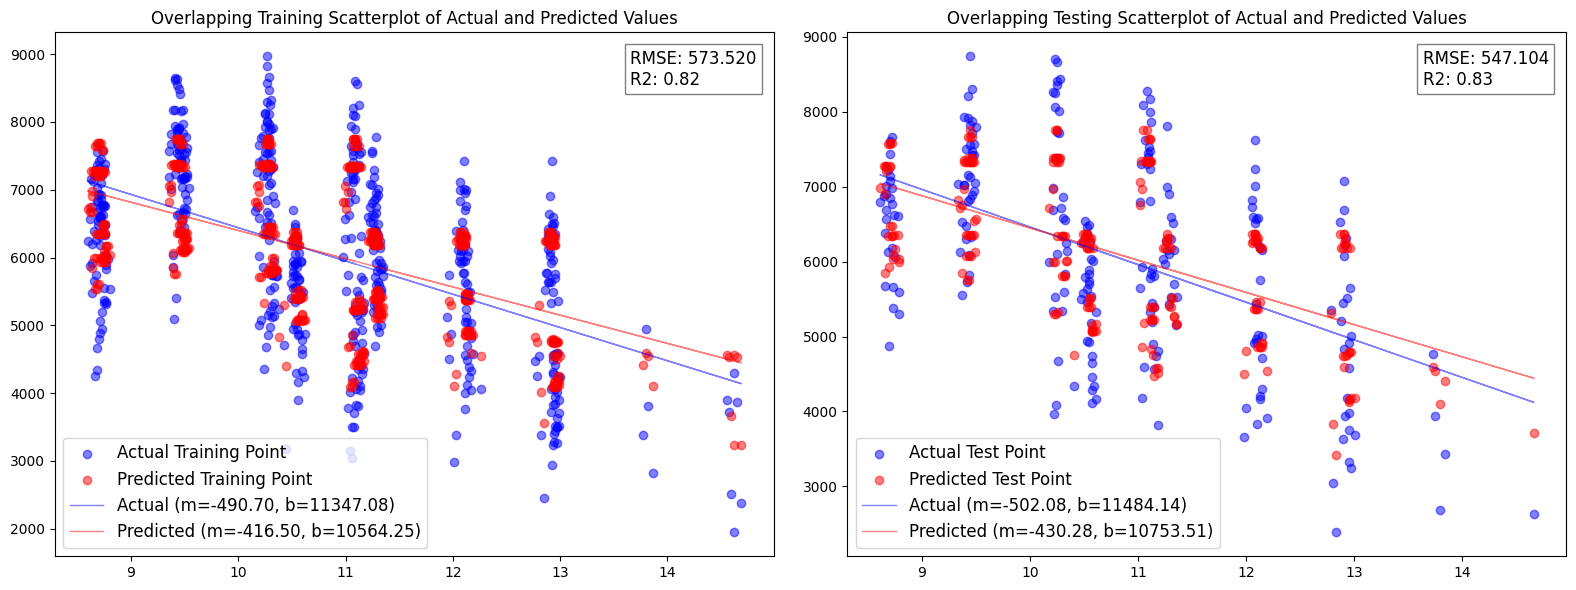

Evaluating XGBOOST REGRESSOR...

***Stats on training data***

MSE: 31231.284640907303
RMSE: 176.7237523393709
Mean Cross Validation Score: 0.9708734221451636
R² score for : 0.982707026224603
Slope(actual): -490.69707506176667 and intercept(actual): 11347.077703538986
Slope(pred): -492.12439871300916 and intercept(pred): 11361.696721633403


*** Stats on testing data***

MSE: 38738.97611930207
RMSE: 196.82219417357908
Mean Cross Validation Score: 0.9708734221451636
R² score for : 0.977830747884851
Slope(actual): -502.0819097212534 and intercept(actual): 11484.13713732688
Slope(pred): -504.71968536936816 and intercept(pred): 11520.236596340059



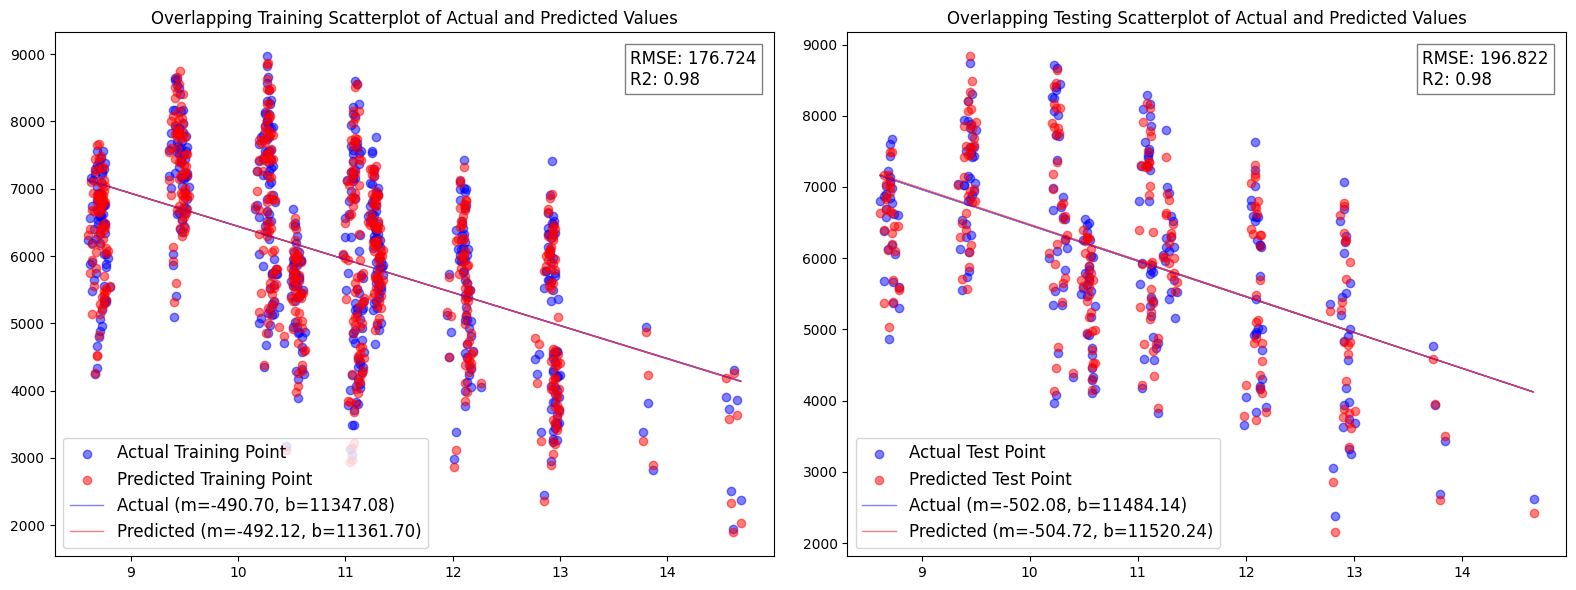

In [128]:
i=0
for model in models:
    model = run_model(names[i],model,x_train,x_test,y_train,y_test)
    i+=1

### WARNING: DO NOT RUN AS RUNNING WILL CHANGE THE MODEL

In [129]:
# import pickle

# with open('model.pkl', 'wb') as file:
#     pickle.dump(model, file)

### Storing comparision data between models 

In [130]:
columns = [
    "training MSE", "training RMSE", "training mean cv score", "training r2 score", 
    "slope(actual)", "slope(predicted)", "intercept(actual)", "intercept(predicted)", 
    "testing MSE", "testing RMSE", "testing mean cv score", "testing r2 score", 
    "slope(actual)", "slope(predicted)", "intercept(actual)", "intercept(predicted)"
]

In [146]:
df_models = pd.DataFrame(index=names, columns=columns)

In [147]:
df_models.loc["LINEAR REGRESSOR"] = [367237.309, 606.001, 0.77845, 0.79666, -490.6971, 11347.0777, -490.6971, 11347.0777, 268269.89693, 517.94777, 0.77845, 0.846476, -502.0819, 11484.1371, -461.9213, 11062.4255]
df_models.loc["DECISION TREE REGRESSOR"] = [218988.4606, 467.9620, 0.82945, 0.87874, -490.69707, 11347.0777, -462.1716, 11038.3504, 206779.1050, 454.7297,  0.82945, 0.88166, -502.0819, 11484.1371, -481.8332, 11290.9617]
df_models.loc["RANDOM FOREST REGRESSOR"] = [408838.7070, 639.405, 0.73833, 0.77362, -490.6971, 11347.0777, -442.5235, 10835.221, 397300.9355, 630.3181, 0.73833, 0.77263, -502.0819, 11484.137, -457.3526, 11043.2286]
df_models.loc["K-NEIGHBOURS REGRESSOR"] = [288670.4271, 537.2806, 0.79462, 0.84016, -490.6971, 11347.0777, -471.8733, 11233.8378, 345149.0742, 587.4939, 0.79462, 0.80248, -502.0819, 11484.137, -485.1274, 11414.3443]
df_models.loc["SUPPORT VECTOR REGRESSOR"] = [1294797.562, 1137.8917, 0.2461,  0.28306, -490.697, 11347.0777, -423.2449, 10781.6404, 1127827.0579, 1061.992, 0.2461, 0.35457, -502.0819, 11484.137, -422.188, 10747.406]
df_models.loc["GRADIENT BOOSTING REGRESSOR"] = [34517.9289, 185.79, 0.97068, 0.9809, -490.697, 11347.0777, -487.1509, 11313.8726, 44719.0446, 211.4688, 0.970677, 0.97441, -502.0819, 11484.1371, -488.933, 11366.2348]
df_models.loc["BAGGING REGRESSOR"] = [372561.1474, 610.3779, 0.76753, 0.7937, -490.697, 11347.0777, -421.428, 10623.545, 349033.6856, 590.7907, 0.76753, 0.80026, -502.0819, 11484.1371, -436.70234, 10837.481]
df_models.loc["ADABOOST REGRESSOR"] = [328924.992, 573.5198, 0.79599, 0.81787, -490.697, 11347.0777, -416.4971, 10564.2518, 299322.3796, 547.1036, 0.79598, 0.8287, -502.08191, 11484.1371, -430.282, 10753.506]
df_models.loc["XGBOOST REGRESSOR"] = [31231.2846, 176.7237, 0.9709, 0.9827, -490.697, 11347.0777, -492.1244, 11361.6967, 38738.9761, 196.8222, 0.97087, 0.97783, -502.0819, 11484.1371, -504.7197, 11520.2366]


In [148]:
df_models

,training MSE,training RMSE,training mean cv score,training r2 score,slope(actual),slope(predicted),intercept(actual),intercept(predicted),testing MSE,testing RMSE,testing mean cv score,testing r2 score,slope(actual),slope(predicted),intercept(actual),intercept(predicted)
LINEAR REGRESSOR,367237.309,606.001,0.77845,0.79666,-490.6971,11347.0777,-490.6971,11347.0777,268269.89693,517.94777,0.77845,0.846476,-502.0819,11484.1371,-461.9213,11062.4255
DECISION TREE REGRESSOR,218988.4606,467.962,0.82945,0.87874,-490.69707,11347.0777,-462.1716,11038.3504,206779.105,454.7297,0.82945,0.88166,-502.0819,11484.1371,-481.8332,11290.9617
RANDOM FOREST REGRESSOR,408838.707,639.405,0.73833,0.77362,-490.6971,11347.0777,-442.5235,10835.221,397300.9355,630.3181,0.73833,0.77263,-502.0819,11484.137,-457.3526,11043.2286
K-NEIGHBOURS REGRESSOR,288670.4271,537.2806,0.79462,0.84016,-490.6971,11347.0777,-471.8733,11233.8378,345149.0742,587.4939,0.79462,0.80248,-502.0819,11484.137,-485.1274,11414.3443
SUPPORT VECTOR REGRESSOR,1294797.562,1137.8917,0.2461,0.28306,-490.697,11347.0777,-423.2449,10781.6404,1127827.0579,1061.992,0.2461,0.35457,-502.0819,11484.137,-422.188,10747.406
GRADIENT BOOSTING REGRESSOR,34517.9289,185.79,0.97068,0.9809,-490.697,11347.0777,-487.1509,11313.8726,44719.0446,211.4688,0.970677,0.97441,-502.0819,11484.1371,-488.933,11366.2348
BAGGING REGRESSOR,372561.1474,610.3779,0.76753,0.7937,-490.697,11347.0777,-421.428,10623.545,349033.6856,590.7907,0.76753,0.80026,-502.0819,11484.1371,-436.70234,10837.481
ADABOOST REGRESSOR,328924.992,573.5198,0.79599,0.81787,-490.697,11347.0777,-416.4971,10564.2518,299322.3796,547.1036,0.79598,0.8287,-502.08191,11484.1371,-430.282,10753.506
XGBOOST REGRESSOR,31231.2846,176.7237,0.9709,0.9827,-490.697,11347.0777,-492.1244,11361.6967,38738.9761,196.8222,0.97087,0.97783,-502.0819,11484.1371,-504.7197,11520.2366


In [145]:
df.sample(5)

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield,mean_temp
501,501,25.0,0.50,0.25,0.38,0.75,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.476808,0.438231,34.744180,5429.681612,51.75
55,55,12.5,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.466974,0.429452,33.669875,4999.156215,57.50
624,624,25.0,0.50,0.25,0.75,0.63,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.354086,0.388136,29.373012,3712.997856,63.25
618,618,25.0,0.50,0.25,0.75,0.63,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.514253,0.453028,36.406982,6254.655109,57.50
72,72,12.5,0.25,0.25,0.25,0.38,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.416271,0.409438,31.577558,4350.424670,57.50
